In [189]:
def apply_discounts(products, stocks):
    """
    Напишите функцию apply_discounts(), которая снижает цену продуктов в словаре products на указанный в словаре stocks процент. 
    Функция должна вернуть результирующий словарь, ключи которого — товары, а значения — новые цены.
    Если продукта из словаря stocks нет в словаре products, то его необходимо пропустить. Цены округлите до второго знака после запятой.
    """
    for key in stocks:
        #print(float(stocks[key].replace('%',''))/100)
        products.update({key:round((products[key] * (1-float(stocks[key].replace('%',''))/100)),2)})
        
    return (products)
    
    
if __name__ == '__main__':
    products={
        "Oranges (packaged)": 114.99, 
        "Candy (Rotfront)": 280.00,
        "Boiled sausage": 199.99,
        "Juice J7 (orange)": 119.99,
        "Trout (Seven Seas)": 399.99
        }
    stocks = {
        "Boiled sausage": "33%",
        "Juice J7 (orange)": "12%",
        "Trout (Seven Seas)": "18%"
    }
    new_products = apply_discounts(products, stocks)
    print(new_products)

{'Oranges (packaged)': 114.99, 'Candy (Rotfront)': 280.0, 'Boiled sausage': 133.99, 'Juice J7 (orange)': 105.59, 'Trout (Seven Seas)': 327.99}


In [190]:
import pandas as pd   
bronze_top = pd.read_csv('bronze_top.csv')
silver_top = pd.read_csv('silver_top.csv')
merged = bronze_top.merge(
    silver_top,
    on='Country',
    suffixes=('_bronze', '_silver')
)
display(bronze_top)
display(silver_top)
display(merged)


,Country,Total
0,United States,1052.0
1,Soviet Union,584.0
2,United Kingdom,505.0
3,France,475.0
4,Germany,454.0


,Country,Total
0,United States,1195.0
1,Soviet Union,627.0
2,United Kingdom,591.0
3,France,461.0
4,Italy,394.0


,Country,Total_bronze,Total_silver
0,United States,1052.0,1195.0
1,Soviet Union,584.0,627.0
2,United Kingdom,505.0,591.0
3,France,475.0,461.0


In [191]:
solar_data = pd.read_csv('solarpower.csv')
solar_data[solar_data['cum_power'] == -1]
display(solar_data['cum_power'].shape[0])
for i in range(664):
    if solar_data['cum_power'].iloc[i] == -1:
        print ((i,(solar_data['cum_power'].iloc[i-1] + solar_data['cum_power'].iloc[i+1])/2))

solar_data['cum_power'].iloc[45] = 20255  
solar_data['cum_power'].iloc[647] = 27998


664

(45, 20255.0)
(647, 27998.0)


C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_8608\2197976246.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\AubakirovMA\AppData\Local\Temp\ipykernel_8608\2197976246.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=False)
solar_data

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0
...,...,...
659,2018-10-22,28101.0
660,2018-10-23,28109.0
661,2018-10-24,28115.0
662,2018-10-25,28117.0


In [180]:
solar_data['month'] = solar_data['date'].dt.to_period('M')
solar_data['day_power'] = solar_data['cum_power'].diff()
plot_data = solar_data.groupby(by='month')['day_power'].mean().round()
plot_data


month
2017-01     3.0
2017-02     4.0
2017-03    11.0
2017-04    16.0
2017-05    19.0
2017-06    22.0
2017-07    18.0
2017-08    15.0
2017-09    12.0
2017-10     6.0
2017-11     3.0
2017-12     1.0
2018-01     2.0
2018-02     7.0
2018-03     9.0
2018-04    15.0
2018-05    21.0
2018-06    19.0
2018-07    22.0
2018-08    17.0
2018-09    14.0
2018-10     9.0
Freq: M, Name: day_power, dtype: float64

In [187]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
px.line(
    data_frame=solar_data,
    x=solar_data['date'],
    y=solar_data['day_power']
)

<AxesSubplot:ylabel='Count'>

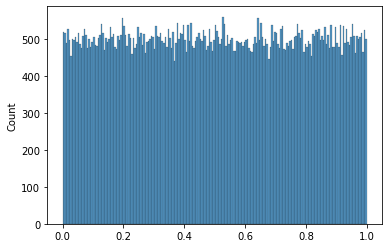

In [12]:
import numpy as np
import seaborn as sns

a = np.random.random(100000)
